# Task 1

## Logistic regression

In [1]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="logreg_l2",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [2]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=1.0000
best_params={'clf__C': 0.1, 'pre__kbest__k': 1000}
Fold scores: 0.9999, 1.0000, 0.9999, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9978
ACC    : 0.9959

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      21       0
True 1       1     223

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  1.0000  0.0000
True 1  0.0045  0.9955

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     0.9545    1.0000    0.9767        21
   Tumor (1)     1.0000    0.9955    0.9978       224

    accuracy                         0.9

Vẽ Top-N gene (map gene_id → gene_name)

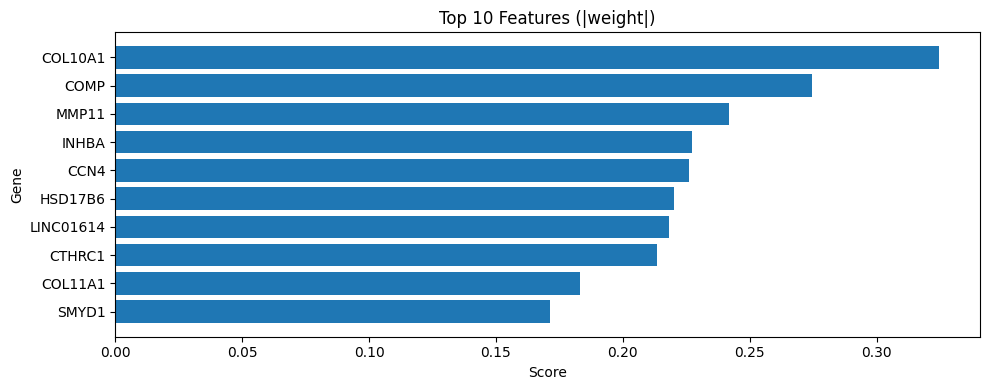

In [3]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


Lưu model + lưu feature importance

In [4]:
paths = save_inference_bundle(res, out_dir="./model", prefix="lr")
paths

{'model': './model/lr_model.joblib',
 'input_feature_cols': './model/lr_input_feature_cols.json',
 'selected_feature_cols': './model/lr_selected_feature_cols.json',
 'metadata': './model/lr_metadata.json'}

## Random forest

In [5]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="rf",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [6]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=1.0000
best_params={'clf__max_depth': None, 'clf__n_estimators': 600, 'pre__kbest__k': 3000}
Fold scores: 0.9999, 1.0000, 0.9999, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9978
ACC    : 0.9959

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      20       1
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  0.9524  0.0476
True 1  0.0000  1.0000

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    0.9524    0.9756        21
   Tumor (1)     0.9956    1.0000    0.9978       224

    a

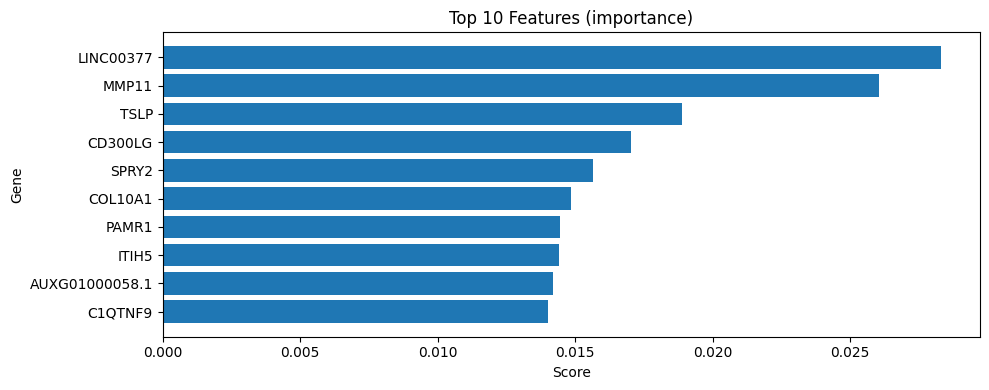

In [7]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [8]:
paths = save_inference_bundle(res, out_dir="./model", prefix="rf")
paths

{'model': './model/rf_model.joblib',
 'input_feature_cols': './model/rf_input_feature_cols.json',
 'selected_feature_cols': './model/rf_selected_feature_cols.json',
 'metadata': './model/rf_metadata.json'}

## SVM

In [9]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="linear_svm",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [10]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=1.0000
best_params={'clf__C': 3, 'pre__kbest__k': 100}
Fold scores: 1.0000, 1.0000, 0.9999, 0.9998, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9956
ACC    : 0.9918

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      19       2
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  0.9048  0.0952
True 1  0.0000  1.0000

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    0.9048    0.9500        21
   Tumor (1)     0.9912    1.0000    0.9956       224

    accuracy                         0.9918

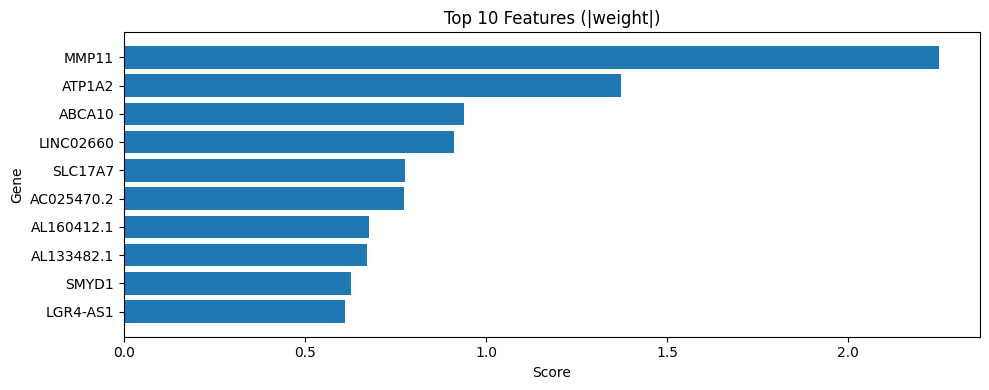

In [11]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [12]:
paths = save_inference_bundle(res, out_dir="./model", prefix="svm")
paths

{'model': './model/svm_model.joblib',
 'input_feature_cols': './model/svm_input_feature_cols.json',
 'selected_feature_cols': './model/svm_selected_feature_cols.json',
 'metadata': './model/svm_metadata.json'}

# XGBoost

In [13]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label.tsv",
    META_PATH="./tumor_normal_label.csv",
    MODEL="xgb",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),  # hoặc 1000
)

res = run_brca_experiment(cfg)



In [14]:
from brca_group_cv_pipeline_bundle_v2 import ExperimentConfig, run_brca_experiment, save_inference_bundle,print_summary

print_summary(res)

===== OVERVIEW =====
Số mẫu: 1,231 | Số gene/features: 60,660
Phân bố nhãn: {0: 113, 1: 1118} (Tumor=1, Normal=0)
Tỉ lệ số 0 toàn ma trận: 0.461
Số Case ID duy nhất (nhóm): 1,095
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=986, test=245 | train groups=875, test groups=220

===== INNER CV (GridSearch) =====
best average_precision=0.9999
best_params={'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'pre__kbest__k': 500}
Fold scores: 0.9999, 1.0000, 1.0000, 0.9999, 1.0000

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 1.0000
PR-AUC : 1.0000
F1     : 0.9956
ACC    : 0.9918

--- Confusion Matrix (counts) ---
        Pred 0  Pred 1
True 0      19       2
True 1       0     224

--- Confusion Matrix (row-normalized) ---
        Pred 0  Pred 1
True 0  0.9048  0.0952
True 1  0.0000  1.0000

--- Classification report ---
              precision    recall  f1-score   support

  Normal (0)     1.0000    0.9048    0.9500        21
   Tumor (1)     0.9912    1.0000   

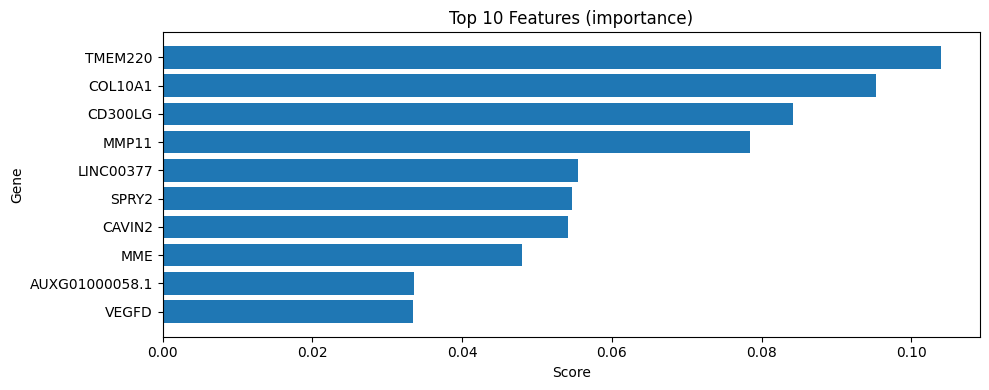

In [15]:
from brca_group_cv_pipeline_bundle_v2 import create_gene_mapper, plot_top_features

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [16]:
paths = save_inference_bundle(res, out_dir="./model", prefix="xgb")
paths

{'model': './model/xgb_model.joblib',
 'input_feature_cols': './model/xgb_input_feature_cols.json',
 'selected_feature_cols': './model/xgb_selected_feature_cols.json',
 'metadata': './model/xgb_metadata.json'}

# task 2

## Logistic regression

In [1]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="logreg_l2",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),
)

res = run_brca_experiment(cfg)


In [2]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8361
best_params={'clf__C': 1, 'pre__kbest__k': 500}
Fold scores: 0.8646, 0.8870, 0.8258, 0.7739, 0.8293

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9446
PR-AUC : 0.8193
F1     : 0.7436
ACC    : 0.8942

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           140            13
True IDC (0)             7            29

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9150        0.0850
True IDC (0)        0.1944        0.8056

--- Classification report ---
              precision    recall  f1-score   support

     ILC (1)     0.9524    0.9150    0.9333   

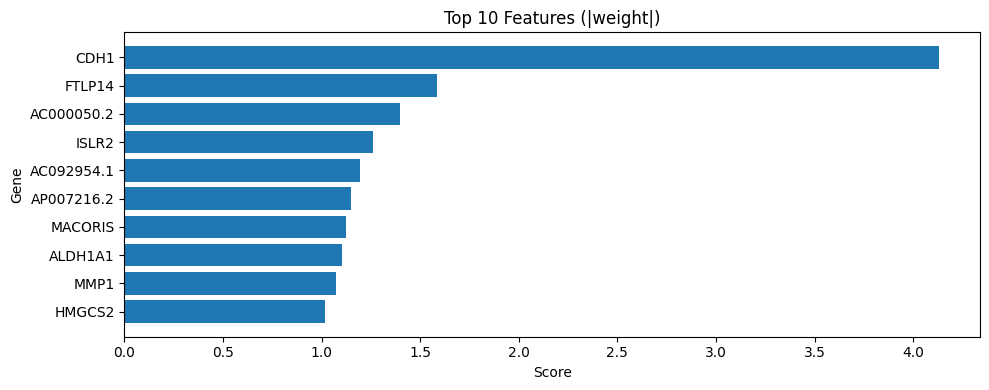

In [3]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [4]:

paths = save_inference_bundle(res, out_dir="./model", prefix="task2_lr")
paths

{'model': './model/task2_lr_model.joblib',
 'input_feature_cols': './model/task2_lr_input_feature_cols.json',
 'selected_feature_cols': './model/task2_lr_selected_feature_cols.json',
 'metadata': './model/task2_lr_metadata.json'}

## Random forest

In [5]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="rf",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),
)

res = run_brca_experiment(cfg)


In [6]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8342
best_params={'clf__max_depth': None, 'clf__n_estimators': 1000, 'pre__kbest__k': 50}
Fold scores: 0.8659, 0.9184, 0.7508, 0.7667, 0.8693

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9173
PR-AUC : 0.8381
F1     : 0.7458
ACC    : 0.9206

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           152             1
True IDC (0)            14            22

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9935        0.0065
True IDC (0)        0.3889        0.6111

--- Classification report ---
              precision    recall  f1-score   support

     ILC 

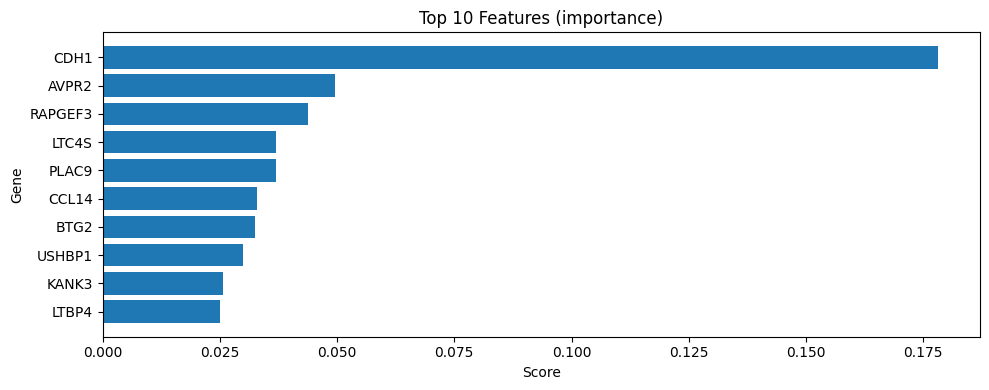

In [7]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [8]:
paths = save_inference_bundle(res, out_dir="./model", prefix="task2_rf")
paths

{'model': './model/task2_rf_model.joblib',
 'input_feature_cols': './model/task2_rf_input_feature_cols.json',
 'selected_feature_cols': './model/task2_rf_selected_feature_cols.json',
 'metadata': './model/task2_rf_metadata.json'}

## SVM

In [9]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="linear_svm",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),
)

res = run_brca_experiment(cfg)


In [10]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8365
best_params={'clf__C': 0.1, 'pre__kbest__k': 100}
Fold scores: 0.8685, 0.9201, 0.7804, 0.7350, 0.8784

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9332
PR-AUC : 0.8263
F1     : 0.7229
ACC    : 0.8783

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           136            17
True IDC (0)             6            30

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.8889        0.1111
True IDC (0)        0.1667        0.8333

--- Classification report ---
              precision    recall  f1-score   support

     ILC (1)     0.9577    0.8889    0.9220 

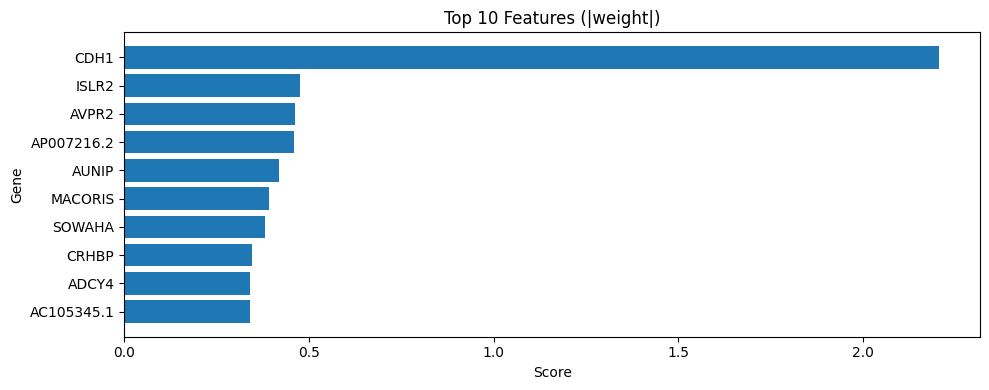

In [11]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [12]:

paths = save_inference_bundle(res, out_dir="./model", prefix="task2_svm")
paths

{'model': './model/task2_svm_model.joblib',
 'input_feature_cols': './model/task2_svm_input_feature_cols.json',
 'selected_feature_cols': './model/task2_svm_selected_feature_cols.json',
 'metadata': './model/task2_svm_metadata.json'}

## XGB

In [13]:
from brca_idc_ilc_groupcv_bundle import ExperimentConfig, run_brca_experiment, print_summary,save_inference_bundle,create_gene_mapper, plot_top_features

cfg = ExperimentConfig(
    MATRIX_PATH="./brca_matrix_with_label_subtyping.tsv",
    META_PATH="./breast_cancer_annotation.csv",
    MODEL="xgb",
    K_FEATURE_LIST=(50,100,500,1000,2000,3000),
)

res = run_brca_experiment(cfg)


In [14]:
print_summary(res)


===== OVERVIEW =====
Số mẫu: 955 | Số gene/features: 60,660
Phân bố nhãn: {0: 767, 1: 188} (0=ILC (1), 1=IDC (0))
Tỉ lệ số 0 toàn ma trận: 0.462
Số Case ID duy nhất (nhóm): 936
Dùng sparse: False

===== OUTER HOLD-OUT =====
train=766, test=189 | train groups=749, test groups=187

===== INNER CV (GridSearch) =====
best average_precision=0.8796
best_params={'clf__max_depth': 3, 'clf__n_estimators': 1000, 'pre__kbest__k': 3000}
Fold scores: 0.9059, 0.9373, 0.7967, 0.8353, 0.9227

===== FINAL TEST (HOLD-OUT) =====
ROC-AUC: 0.9430
PR-AUC : 0.8630
F1     : 0.7647
ACC    : 0.9153

--- Confusion Matrix (counts) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)           147             6
True IDC (0)            10            26

--- Confusion Matrix (row-normalized) ---
              Pred ILC (1)  Pred IDC (0)
True ILC (1)        0.9608        0.0392
True IDC (0)        0.2778        0.7222

--- Classification report ---
              precision    recall  f1-score   support

     ILC (

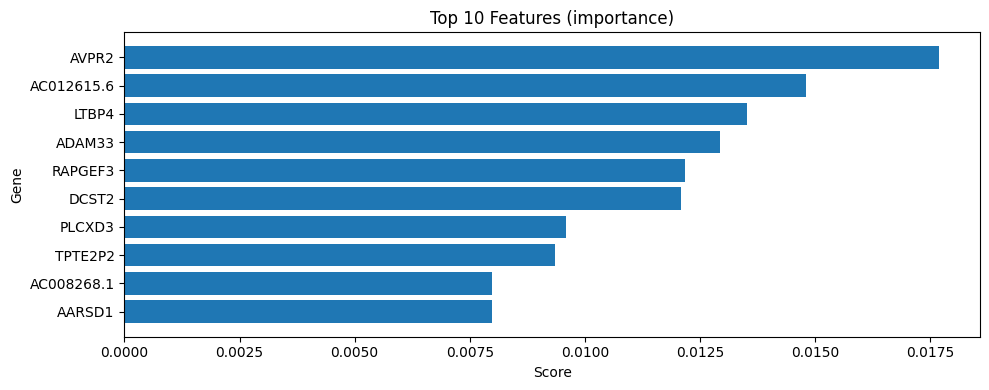

In [15]:

mapper, _ = create_gene_mapper("./gene_id_to_gene_name.csv")

feat_df = res["feature_importance"]
plot_top_features(feat_df, top_n=10, gene_mapper=mapper)


In [16]:

paths = save_inference_bundle(res, out_dir="./model", prefix="task2_xgb")
paths

{'model': './model/task2_xgb_model.joblib',
 'input_feature_cols': './model/task2_xgb_input_feature_cols.json',
 'selected_feature_cols': './model/task2_xgb_selected_feature_cols.json',
 'metadata': './model/task2_xgb_metadata.json'}